In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [15]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [16]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [17]:
data.select_dtypes(include='number').nunique()

Age              50
RestingBP        67
Cholesterol     222
FastingBS         2
MaxHR           119
Oldpeak          53
HeartDisease      2
dtype: int64

In [18]:
data.select_dtypes(include='object').nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [19]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

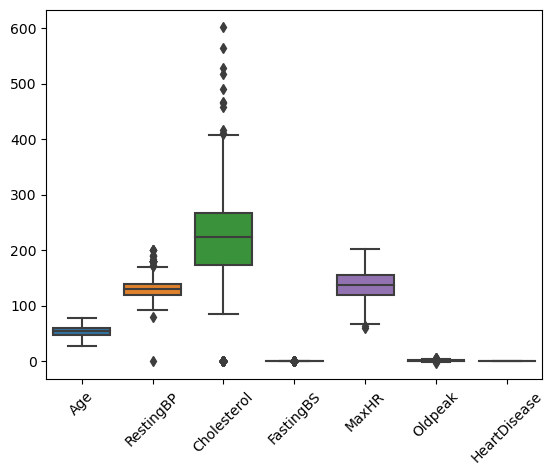

In [22]:
plt.xticks(rotation=45)
sns.boxplot(data)

In [24]:
data['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

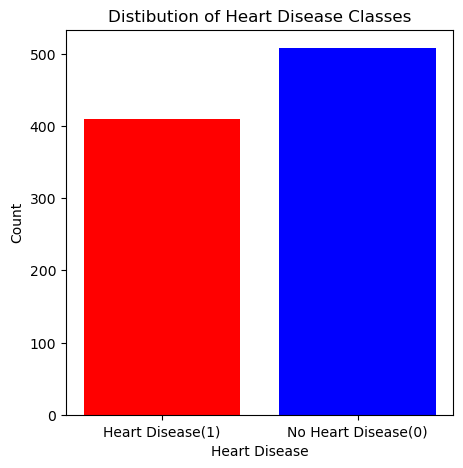

In [26]:
class_counts = data['HeartDisease'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks(class_counts.index, ['No Heart Disease(0)', 'Heart Disease(1)'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')

plt.title('Distibution of Heart Disease Classes')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

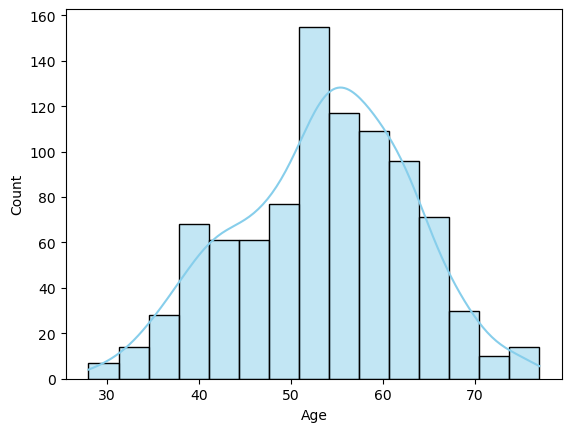

In [28]:
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')

<Axes: xlabel='Sex', ylabel='count'>

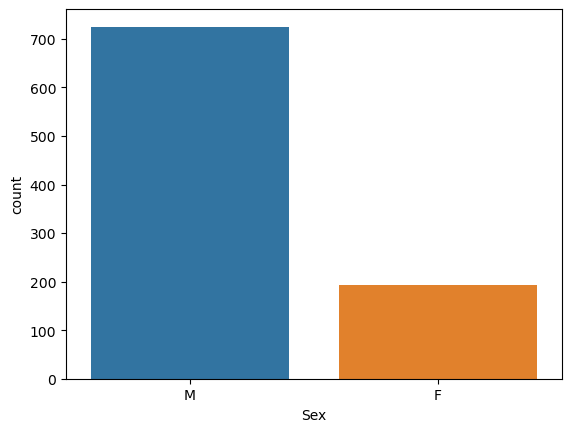

In [33]:
sns.countplot(data=data, x='Sex')

<Axes: xlabel='ChestPainType', ylabel='count'>

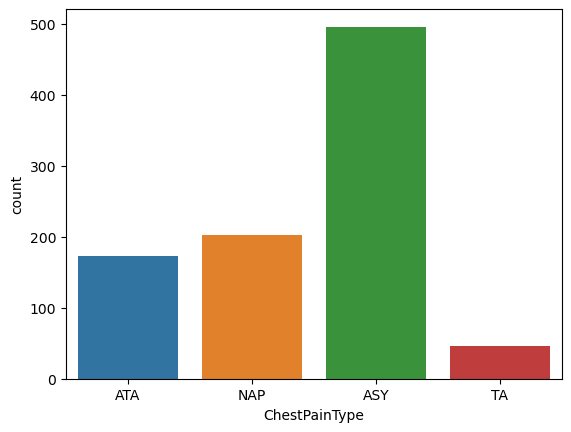

In [34]:
sns.countplot(data=data, x='ChestPainType')

<Axes: xlabel='Cholesterol', ylabel='Count'>

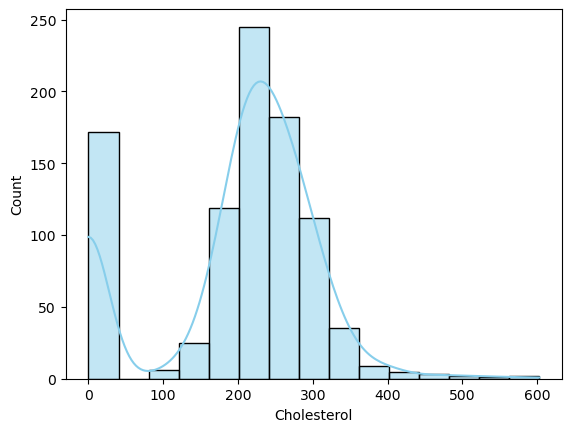

In [36]:
sns.histplot(data['Cholesterol'], bins=15, kde=True, color='skyblue')

<Axes: xlabel='FastingBS', ylabel='count'>

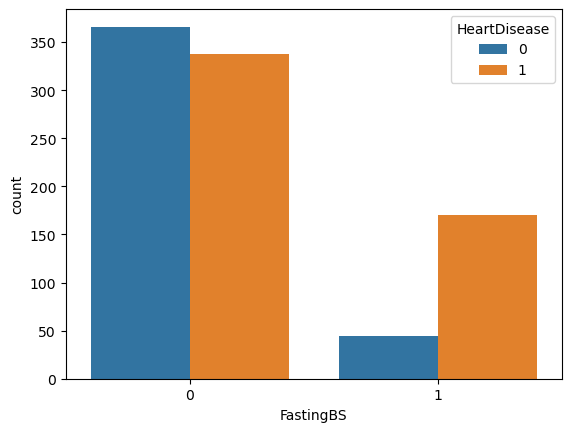

In [37]:
sns.countplot(data=data, x='FastingBS', hue='HeartDisease')

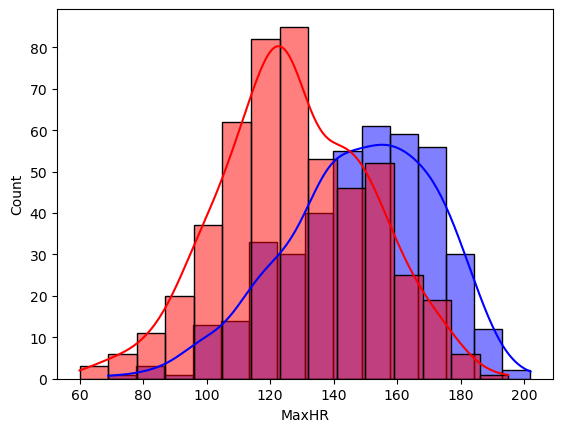

In [42]:
sns.histplot(data[data['HeartDisease'] == 0]['MaxHR'], bins=15, kde=True, label='No Heart Disease (0)', color="blue")
sns.histplot(data[data['HeartDisease'] == 1]['MaxHR'], bins=15, kde=True, label='Heart Disease (1)', color='red')
plt.show()

C:\Users\ROHIT-PC\AppData\Local\Temp\ipykernel_3024\3499501668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

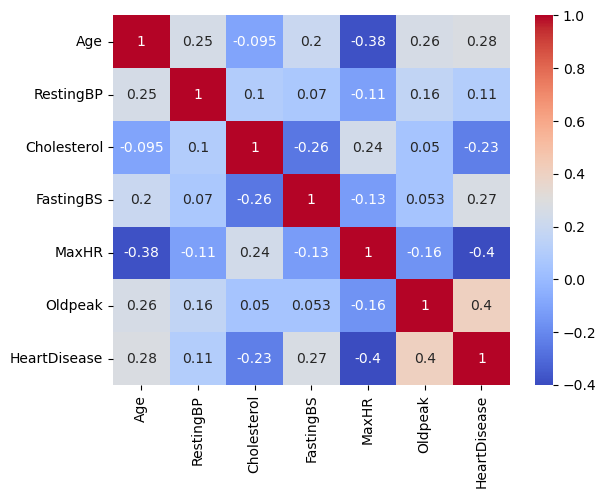

In [43]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

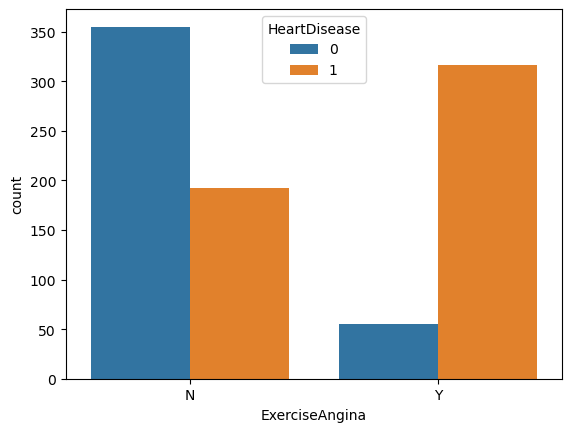

In [45]:
sns.countplot(data=data, x='ExerciseAngina', hue='HeartDisease')

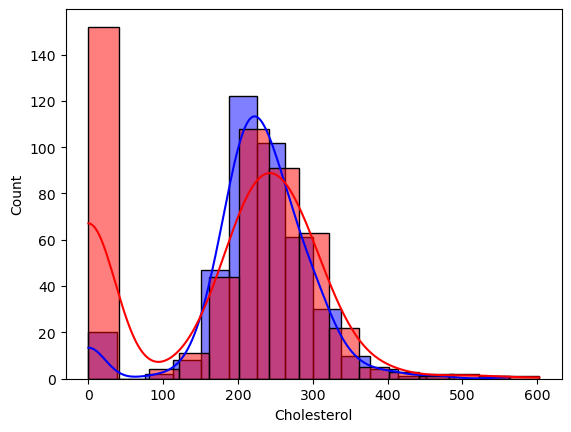

In [46]:
sns.histplot(data[data['HeartDisease'] == 0]['Cholesterol'], bins=15, kde=True, label='No Heart Disease (0)', color="blue")
sns.histplot(data[data['HeartDisease'] == 1]['Cholesterol'], bins=15, kde=True, label='Heart Disease (1)', color='red')
plt.show()